In [54]:
#importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#uploading data in CSV format
df=pd.read_csv('Amazon Sale Report.csv',encoding='unicode_escape')

In [56]:
#checking the top 5 rows
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [57]:
df.info() #finding the details about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [58]:
df.describe() #finding the statistical information of data

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [59]:
df.isnull().sum() #checking the sum of null values
#Amount, Currency has many null values while New and PendingS has all null values,(ship-city,ship-state,ship-postal-code,ship-country has 35 null values each)

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [60]:
df.dtypes #finding the data types

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
B2B                      bool
fulfilled-by           object
New                   float64
PendingS              float64
dtype: object

In [61]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [62]:
df['ship-country'].unique() #finding the uniques values of a particular column

array(['IN', nan], dtype=object)

In [63]:
df=df.drop(['New','PendingS','index'],axis=1,inplace=True) #since ['New','PendingS']columns have a lot of null values
#i am dropping those nulls , as columns, and this change is permanent. Index column is of no use, so I dropped it

In [64]:
df.head() #checking the first 5 rows of data after cleaning

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [65]:
df.tail(10) #checking the last 10 rows of data after cleaning

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
128966,408-5154281-4593912,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Trousers,3XL,Unshipped,1,INR,574.0,Prayagraj (ALLAHABAD),UTTAR PRADESH,211007.0,IN,False,NaN
128967,406-9812666-2474761,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1132.0,CHENNAI 600042,TAMIL NADU,600042.0,IN,False,NaN
128968,404-5182288-1653947,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,Shirt,XS,Cancelled,0,NaN,NaN,Kolkata,WEST BENGAL,700040.0,IN,False,NaN
128969,403-7059995-7618722,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XL,Shipped,1,INR,824.0,Delhi,DELHI,110053.0,IN,False,NaN
128970,404-3802633-7250760,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,T-shirt,M,Unshipped,1,INR,612.0,MUMBAI,MAHARASHTRA,400017.0,IN,False,NaN
128971,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN
128972,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,1,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN
128973,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,1,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN
128974,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,1,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN
128975,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,1,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN


In [66]:
df.info() #finding the details about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   Status              128976 non-null  object 
 3   Fulfilment          128976 non-null  object 
 4   Sales Channel       128976 non-null  object 
 5   ship-service-level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   Courier Status      128976 non-null  object 
 9   Qty                 128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship-city           128941 non-null  object 
 13  ship-state          128941 non-null  object 
 14  ship-postal-code    128941 non-null  float64
 15  ship-country        128941 non-nul

In [68]:
pd.isnull(df).sum() #finding the sum of nulls in data

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [69]:
df.dropna(inplace=True) #dropping all NA's and its a permanent delete

In [72]:
df.shape #finding the rows to column shape

(37514, 18)

In [73]:
pd.isnull(df).sum() #checking if there is any nulls left after cleaning 

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [78]:
df.dtypes #looking at the dtypes

Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Category               object
Size                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code        int64
ship-country           object
B2B                      bool
fulfilled-by           object
dtype: object

In [77]:
df['ship-postal-code']=df['ship-postal-code'].astype(int) #this particular column as to be int but its float from the above cell, so changing the dtype to int

In [79]:
df['Date']=pd.to_datetime(df['Date']) #this particular column as to be in date format but its object from the above cell, so changing the dtype to int

/var/folders/rz/qt1sykq137zg52wc458b64lc0000gn/T/ipykernel_925/3023999556.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [80]:
df.dtypes

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Category                      object
Size                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code               int64
ship-country                  object
B2B                             bool
fulfilled-by                  object
dtype: object

In [84]:
df.rename(columns={'Qty':'Quantity'},inplace=True) #renaming one column and the change is permanent

In [85]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship


In [86]:
df.describe() #statistical info of data

,Date,Quantity,Amount,ship-postal-code
count,37514,37514.000000,37514.000000,37514.000000
mean,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,NaN,0.354160,279.952414,194550.425637


In [87]:
df.describe(include='object') #info of object data

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [91]:
df[['Quantity','Amount']].describe()

,Quantity,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


In [92]:
df.columns #to get the column names

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

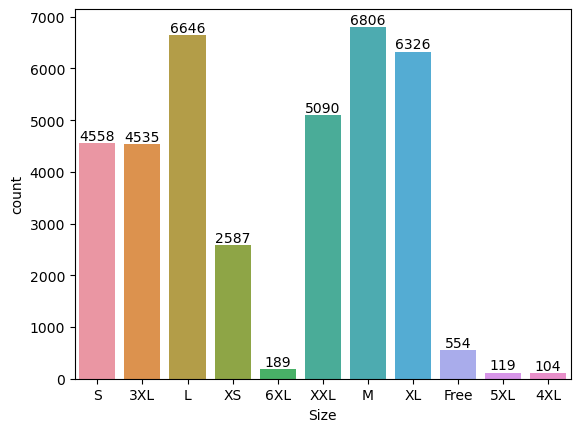

In [98]:
ax=sns.countplot(x='Size',data=df)  #count plot to check the count of the sizes 

#using forloop for labels
for bars in ax.containers:
  ax.bar_label(bars)

#or can use below code for labels
#ax.bar_label(ax.containers[0])


In [103]:
bx=df.groupby(['Size'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending = False)

In [104]:
bx

,Size,Quantity
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


[Text(0, 0, '5905'),
 Text(0, 0, '5795'),
 Text(0, 0, '5481'),
 Text(0, 0, '4465'),
 Text(0, 0, '3972'),
 Text(0, 0, '3896'),
 Text(0, 0, '2191'),
 Text(0, 0, '467'),
 Text(0, 0, '170'),
 Text(0, 0, '104'),
 Text(0, 0, '93')]

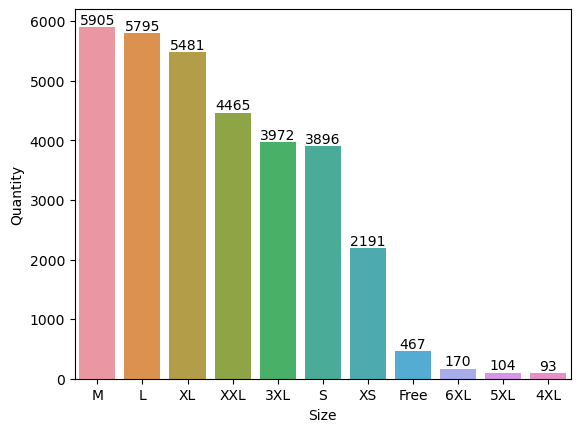

In [112]:
bx1=sns.barplot(data=bx,x='Size',y='Quantity')
bx1.bar_label(bx1.containers[0])

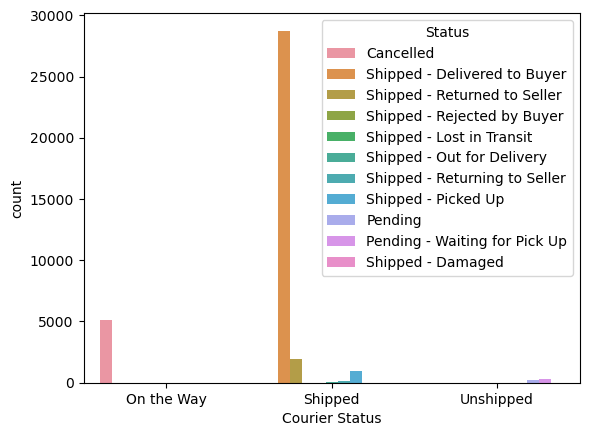

In [114]:
cx=sns.countplot(data=df,x='Courier Status',hue='Status')

In [ ]:
#Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
#       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
#       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
#       'ship-country', 'B2B', 'fulfilled-by'],
#      dtype='object')

<Axes: >

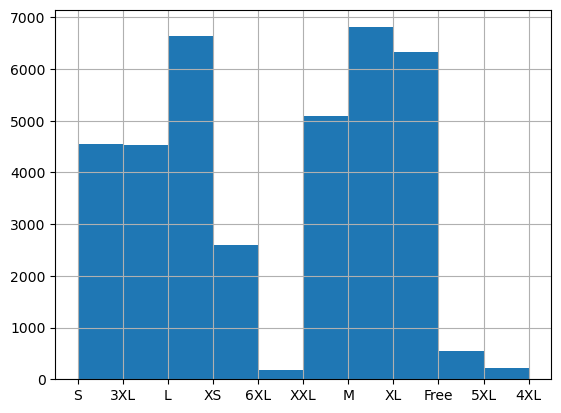

In [117]:
#histogram
df['Size'].hist()

In [118]:
#Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
#       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
#       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
#       'ship-country', 'B2B', 'fulfilled-by'],
#      dtype='object')
df['Category']=df['Category'].astype(str)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order ID            37514 non-null  object        
 1   Date                37514 non-null  datetime64[ns]
 2   Status              37514 non-null  object        
 3   Fulfilment          37514 non-null  object        
 4   Sales Channel       37514 non-null  object        
 5   ship-service-level  37514 non-null  object        
 6   Category            37514 non-null  object        
 7   Size                37514 non-null  object        
 8   Courier Status      37514 non-null  object        
 9   Quantity            37514 non-null  int64         
 10  currency            37514 non-null  object        
 11  Amount              37514 non-null  float64       
 12  ship-city           37514 non-null  object        
 13  ship-state          37514 non-null  object        

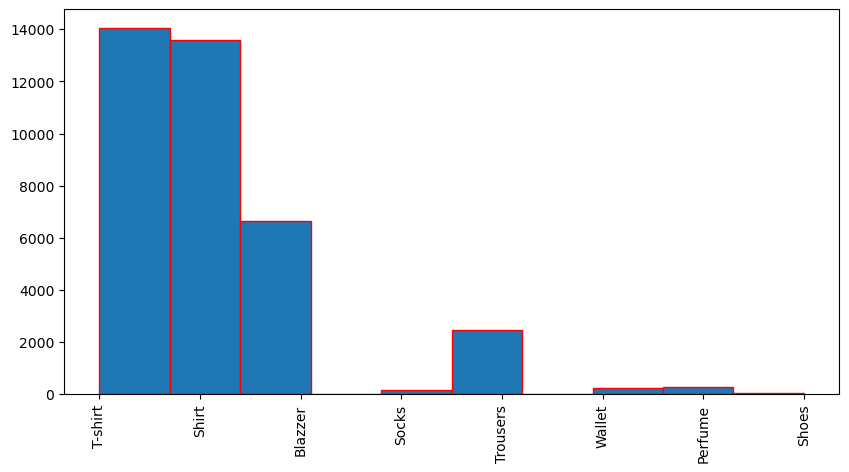

In [129]:
plt.figure(figsize=(10,5))
plt.hist(df['Category'],bins=10,edgecolor='red') 
plt.xticks(rotation=90)
plt.show()

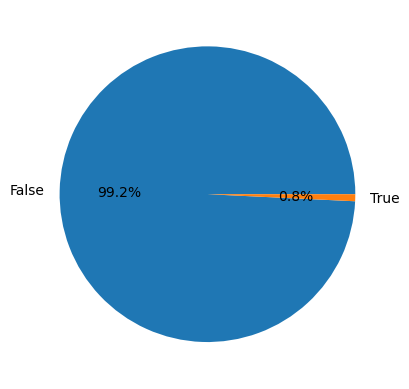

In [136]:
#Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
#       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
#       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
#       'ship-country', 'B2B', 'fulfilled-by'],
#      dtype='object')
b2b=df['B2B'].value_counts()
#plot the pie chart
plt.pie(b2b,labels=b2b.index,autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'Scatter Plot')

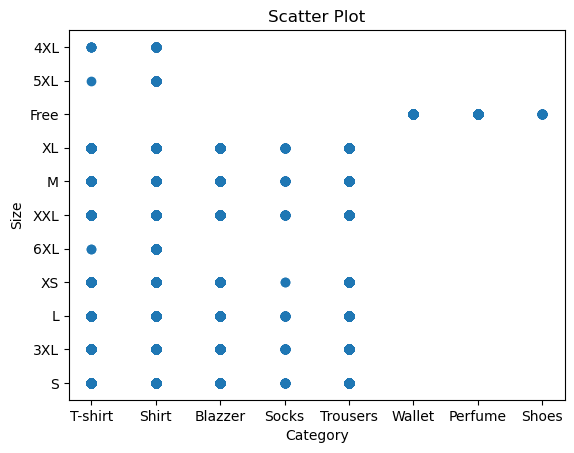

In [138]:
#scatterplt

plt.scatter(df['Category'],df['Size'])
plt.xlabel('Category')
plt.ylabel('Size')
plt.title("Scatter Plot")

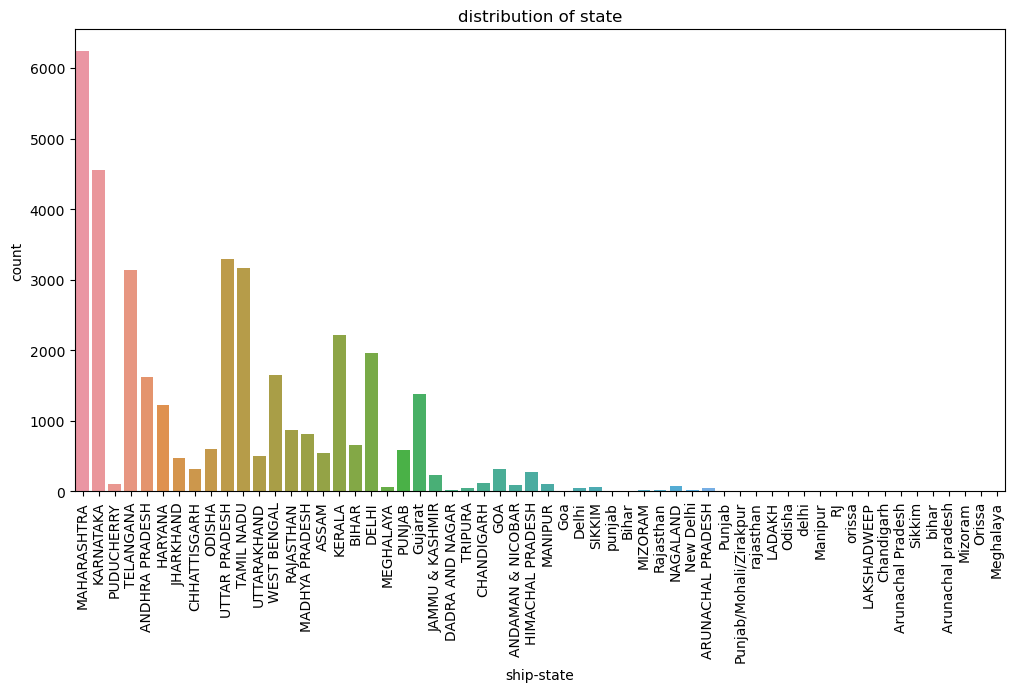

In [145]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title("distribution of state")
plt.xticks(rotation=90)
plt.show()
#Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
#       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
#       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
#       'ship-country', 'B2B', 'fulfilled-by'],
#      dtype='object')

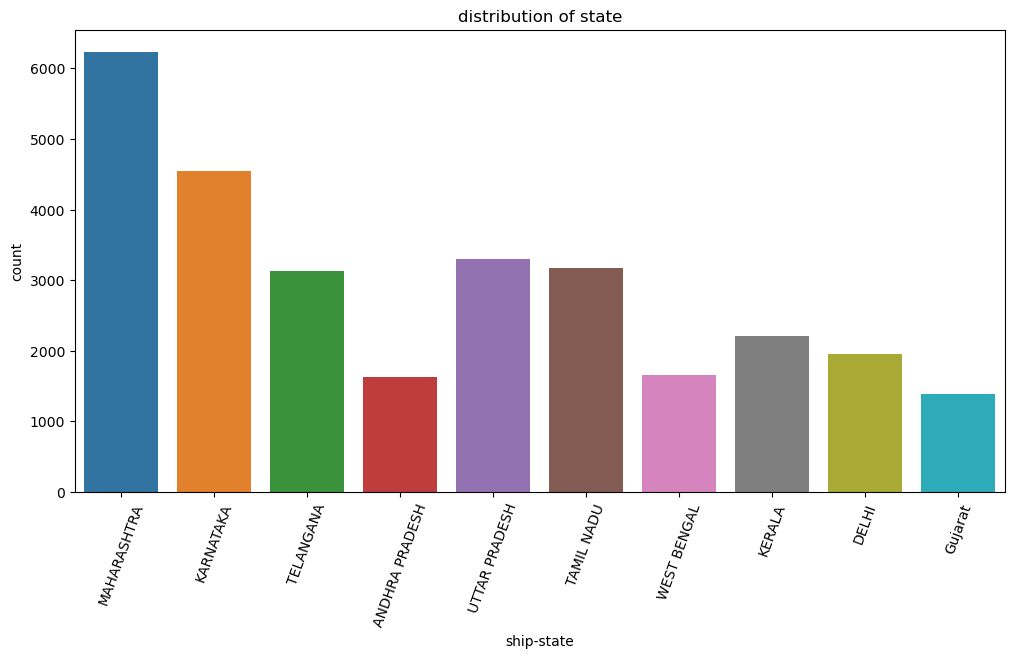

In [153]:
#checking for top 10 states
top10_states=df['ship-state'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.countplot(data=df[df['ship-state'].isin(top10_states.index)],x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title("distribution of state")
plt.xticks(rotation=70)
plt.show()


Conclusion:
    Most bought products are from Clothing - Shirts and T shirts or Size M as the highest count followed by Size L. Very negligible ratio of products are either rejected, returned or lost in transit.The top 5 selling states are Maharashtra, Karnataka, Telangana, AP and UP. 99.2% is retail goods while only 0.8% is B2B
    